# Chapter 4: Field data study Rockeskyller Kopf
# Visualization


<div class="alert alert-success">
    
This Notebook Visualizes the results of notebooks 4.1 to 4.3 and save the best JME1 (JME1_10_1) to the mesh and saves it as ``.vtk`` for visualization in ParaView.

In [1]:
# %% IMPORTS
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import pygimli           as pg
import pygimli.meshtools as mt
import cmasher           as cmr
import pyvista           as pyv
import functools
import sys

from mpl_toolkits               import mplot3d
from mpl_toolkits.mplot3d       import Axes3D
from pygimli.viewer             import pv
from PlotFunctions_Ch5          import *

No module named 'panel'.
You need to install this optional dependency to use interactive 3D visualizations within Jupyter notebooks.


## Parameters/File Names

In [2]:
# %% Filenames
path = 'C:/Users/azieg/Documents/GitHub/JMEI_Paper/'

fig_dir = path+'Figures/Ch-4/'
fn_dir  = path+'Data/Rockeskyll/'

fn_magnetic = 'Magnetic_data_corrected.csv'

fn_all = 'ert_data_rockes_all'
geo1 ='Geo/2023_ERTL1_Locations.csv'
geo2 ='Geo/2023_ERTL2_Locations.csv'
geo3 ='Geo/2023_ERTL3_Locations.csv'
geo4 ='Geo/2023_ERTL4_Locations.csv'

# Results Conventional
fn_res2d1 = 'Res_Conventional/res_2d1.npy'
fn_res2d2 = 'Res_Conventional/res_2d2.npy'
fn_res2d3 = 'Res_Conventional/res_2d3.npy'
fn_res2d4 = 'Res_Conventional/res_2d4.npy'
fn_res_con = 'Res_Conventional/res_con.npy'
fn_sus_con = 'Res_Conventional/sus_con.npy'
fn_misfit_2d = 'Res_Conventional/misfit_2d.npy'
fn_misfit_mag_con = 'Res_Conventional/misfit_mag_con.npy'
fn_misfit_ert_con = 'Res_Conventional/misfit_ert_con.npy'

# Results ME1
fn_sus_me1 = 'Res_ME1/sus_me.npy'
fn_res_me1 = 'Res_ME1/res_me.npy'
fn_misfit_mag_me1 = 'Res_ME1/misfit_mag_me.npy'
fn_misfit_ert_me1 = 'Res_ME1/misfit_ert_me.npy'

# Results ME2
fn_sus_me2 = 'Res_ME2/sus_me.npy'
fn_res_me2 = 'Res_ME2/res_me.npy'
fn_misfit_mag_me2 = 'Res_ME2/misfit_mag_me.npy'
fn_misfit_ert_me2 = 'Res_ME2/misfit_ert_me.npy'

# Results JME1_1_1
JME1 = 'JME1/Res_JME1_1_1'
fn_sus_jme1 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme1 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme1 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme1 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_100_1
JME1 = 'JME1/Res_JME1_100_1'
fn_sus_jme2 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme2 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme2 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme2 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_1_100
JME1 = 'JME1/Res_JME1_1_100'
fn_sus_jme3 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme3 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme3 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme3 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_10_1
JME1 = 'JME1/Res_JME1_10_1'
fn_sus_jme4 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme4 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme4 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme4 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Plotting
c_ert = 'gnuplot'
c_mag = cmr.tropical

lim_ert = [20,400]
lim_mag =[0,0.15]

## Load Geometries and Meshes

In [3]:
df = pd.read_csv(fn_dir+fn_magnetic, delimiter=',', decimal='.')
pnts = np.array([[df['X'][i], df['Y'][i], df['Z'][i]] for i in range(len(df))])

df1 = pd.read_csv(fn_dir+geo1, delimiter=',', decimal='.')
p1 = np.array([[df1['X'][i], df1['Y'][i], df1['Z'][i]] for i in range(len(df1))])

df2 = pd.read_csv(fn_dir+geo2, delimiter=',', decimal='.')
p2 = np.array([[df2['X'][i], df2['Y'][i], df2['Z'][i]] for i in range(len(df2))])

df3 = pd.read_csv(fn_dir+geo3, delimiter=',', decimal='.')
p3 = np.array([[df3['X'][i], df3['Y'][i], df3['Z'][i]] for i in range(len(df3))])
p3 = p3[:-1,:] # This array has one electrode too much :(

df4 = pd.read_csv(fn_dir+geo4, delimiter=',', decimal='.')
p4 = np.array([[df4['X'][i], df4['Y'][i], df4['Z'][i]] for i in range(len(df4))])

mesh = pg.load(fn_dir+'invmesh.bms')
m2d1 = pg.load(fn_dir+'mesh_2d1.bms')
m2d2 = pg.load(fn_dir+'mesh_2d2.bms')
m2d3 = pg.load(fn_dir+'mesh_2d3.bms')
m2d4 = pg.load(fn_dir+'mesh_2d4.bms')

#Coverage 
cov1 = np.load(fn_dir+'Res_Conventional/cov1.npy')
cov2 = np.load(fn_dir+'Res_Conventional/cov2.npy')
cov3 = np.load(fn_dir+'Res_Conventional/cov3.npy')
cov4 = np.load(fn_dir+'Res_Conventional/cov4.npy')

## Load Results

In [4]:
res2d1 = np.load(fn_dir+fn_res2d1)
res2d2 = np.load(fn_dir+fn_res2d2)
res2d3 = np.load(fn_dir+fn_res2d3)
res2d4 = np.load(fn_dir+fn_res2d4)

res_con = np.load(fn_dir+fn_res_con)
sus_con = np.load(fn_dir+fn_sus_con)

res_me1 = np.load(fn_dir+fn_res_me1)
sus_me1 = np.load(fn_dir+fn_sus_me1)

res_me2 = np.load(fn_dir+fn_res_me2)
sus_me2 = np.load(fn_dir+fn_sus_me2)

res_jme1 = np.load(fn_dir+fn_res_jme1)
sus_jme1 = np.load(fn_dir+fn_sus_jme1)

res_jme2 = np.load(fn_dir+fn_res_jme2)
sus_jme2 = np.load(fn_dir+fn_sus_jme2)

res_jme3 = np.load(fn_dir+fn_res_jme3)
sus_jme3 = np.load(fn_dir+fn_sus_jme3)

res_jme4 = np.load(fn_dir+fn_res_jme4)
sus_jme4 = np.load(fn_dir+fn_sus_jme4)

## Load Misfit

In [5]:
misfit_2d      = np.load(fn_dir+fn_misfit_2d)
misfit_mag_con = np.load(fn_dir+fn_misfit_mag_con)
misfit_ert_con = np.load(fn_dir+fn_misfit_ert_con)

misfit_mag_me1 = np.load(fn_dir+fn_misfit_mag_me1)
misfit_ert_me1 = np.load(fn_dir+fn_misfit_ert_me1)

misfit_mag_me2 = np.load(fn_dir+fn_misfit_mag_me2)
misfit_ert_me2 = np.load(fn_dir+fn_misfit_ert_me2)

misfit_mag_jme1 = np.load(fn_dir+fn_misfit_mag_jme1)
misfit_ert_jme1 = np.load(fn_dir+fn_misfit_ert_jme1)

misfit_mag_jme2 = np.load(fn_dir+fn_misfit_mag_jme2)
misfit_ert_jme2 = np.load(fn_dir+fn_misfit_ert_jme2)

misfit_mag_jme3 = np.load(fn_dir+fn_misfit_mag_jme3)
misfit_ert_jme3 = np.load(fn_dir+fn_misfit_ert_jme3)

misfit_mag_jme4 = np.load(fn_dir+fn_misfit_mag_jme4)
misfit_ert_jme4 = np.load(fn_dir+fn_misfit_ert_jme4)

## Interpolate 2D Sections

### Create interpolation indices for nearest neighbour method
**Only creates the indices**

In [6]:
# p_list = [p1,p2,p3,p4]
# m_list = [m2d1,m2d2,m2d3,m2d4]

# int_idx_all = interpolate2D_to_3DIndexNN(m_list, p_list, mesh)

# idx_all = int_idx_all
# for j in idx_all:
#     for i in range(len(j)):
#         if j[i]=='nan':
#             j[i] = np.nan

In [7]:
# [idx1,idx2,idx3,idx4] = [np.array(idx_all[0]),np.array(idx_all[1]),np.array(idx_all[2]),np.array(idx_all[3])]

# np.save(fn_dir+'int_ind1',idx1)
# np.save(fn_dir+'int_ind2',idx2)
# np.save(fn_dir+'int_ind3',idx3)
# np.save(fn_dir+'int_ind4',idx4)

### Load indices (if they already exist)

In [8]:
idx1 = np.load(fn_dir+'int_ind1.npy')
idx2 = np.load(fn_dir+'int_ind2.npy')
idx3 = np.load(fn_dir+'int_ind3.npy')
idx4 = np.load(fn_dir+'int_ind4.npy')
idx_all_list = [idx1,idx2,idx3,idx4]

### Interpolate data to 2D section (linear and nearest neighbour method)

In [9]:
def Transfer3DdataTo2DSection(data, int_idx_all, x=1):
    data_intnn = []
    for int_idx in int_idx_all:
        d_int = []
        for i in int_idx:
            if np.isnan(i):
                d_int.append(x)
            else:
                d_int.append(data[int(i)])
        data_intnn.append(np.array(d_int))
    return data_intnn

In [10]:
p_list = [p1,p2,p3,p4]
m_list = [m2d1,m2d2,m2d3,m2d4]

# With nearest neighbour interpolation
res_con_int_nn = Transfer3DdataTo2DSection(res_con, idx_all_list, x=30)
res_me1_int_nn = Transfer3DdataTo2DSection(res_me1, idx_all_list, x=30)
res_me2_int_nn = Transfer3DdataTo2DSection(res_me2, idx_all_list, x=30)
res_jme1_int_nn = Transfer3DdataTo2DSection(res_jme1, idx_all_list, x=30)
res_jme2_int_nn = Transfer3DdataTo2DSection(res_jme2, idx_all_list, x=30)
res_jme3_int_nn = Transfer3DdataTo2DSection(res_jme3, idx_all_list, x=30)
res_jme4_int_nn = Transfer3DdataTo2DSection(res_jme4, idx_all_list, x=30)

sus_con_int_nn = Transfer3DdataTo2DSection(sus_con, idx_all_list, x=0.01)
sus_me1_int_nn = Transfer3DdataTo2DSection(sus_me1, idx_all_list, x=0.01)
sus_me2_int_nn = Transfer3DdataTo2DSection(sus_me2, idx_all_list, x=0.01)
sus_jme1_int_nn = Transfer3DdataTo2DSection(sus_jme1, idx_all_list, x=0.01)
sus_jme2_int_nn = Transfer3DdataTo2DSection(sus_jme2, idx_all_list, x=0.01)
sus_jme3_int_nn = Transfer3DdataTo2DSection(sus_jme3, idx_all_list, x=0.01)
sus_jme4_int_nn = Transfer3DdataTo2DSection(sus_jme4, idx_all_list, x=0.01)

## Inspect Models

### Show 3D Mesh

In [11]:
pl,_ = pg.show(mesh, pg.z(mesh.cellCenters()), cMap='terrain', notebook=False, label='Elevation (m.a.s.l.)', hold=True)
pv.drawSensors(pl, p1, diam=1, color='firebrick')
pv.drawSensors(pl, p2, diam=1, color='coral')
pv.drawSensors(pl, p3, diam=1, color='darkorange')
pv.drawSensors(pl, p4, diam=1, color='gold')
pv.drawSensors(pl, pnts, diam=1, color='blue')

# pl.add_title(f'3D Inversion mesh')   

pv.drawMesh(pl, mesh, style="wireframe", cMap='binary')

pl.camera.azimuth = 240
pl.camera.elevation = 2
pl.camera.zoom(0.9)

pl.show_bounds(show_xaxis=True, show_yaxis=True, show_zaxis=True, 
               show_xlabels=True, show_ylabels=True, show_zlabels=True,ticks='outside', all_edges=True,
               grid=None,location='closest',xlabel='Easting',ylabel='Northing',zlabel='Elevation', bold=True)
pl.show()#screenshot=fig_dir+'3DMesh.png',window_size=[1800, 2000])


False

### Show 2D Inversion sections

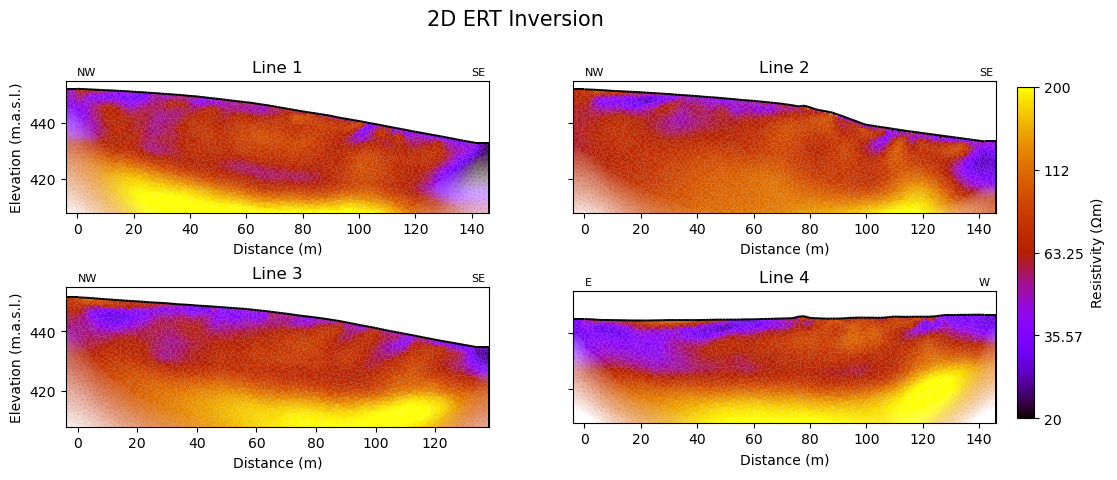

In [12]:
%matplotlib inline
m_list = [m2d1,m2d2,m2d3,m2d4]
cov_list = [cov1, cov2, cov3, cov4]
res_2d = [res2d1, res2d2, res2d3, res2d4]


fig,ax = plt.subplots(2,2, figsize=(12,5), sharey=True)

pg.show(m_list[0], res_2d[0], ax=ax[0,0], coverage=cov_list[0], cMap=c_ert, cMin=20, cMax=200, colorBar=False, logScale=True)
pg.show(m_list[1], res_2d[1], ax=ax[0,1], coverage=cov_list[1], cMap=c_ert, cMin=20, cMax=200, colorBar=False, logScale=True)
pg.show(m_list[2], res_2d[2], ax=ax[1,0], coverage=cov_list[2], cMap=c_ert, cMin=20, cMax=200, colorBar=False, logScale=True)
pg.show(m_list[3], res_2d[3], ax=ax[1,1], coverage=cov_list[3], cMap=c_ert, cMin=20, cMax=200, colorBar=False, logScale=True)

for a in ax:
    for axis in a:
        axis.set_ylim(408,455)
        axis.set_xlabel('Distance (m)')
ax[0,0].set_ylabel('Elevation (m.a.s.l.)')
ax[1,0].set_ylabel('Elevation (m.a.s.l.)')
ax[0,0].set_title('Line 1')
ax[0,1].set_title('Line 2')
ax[1,0].set_title('Line 3')
ax[1,1].set_title('Line 4')

# Add colorbar
cax = ax[0,1].inset_axes([1.05, -1.55, 0.04, 2.5])
createColorBarOnly(ax=cax, cMin=20, cMax=200, logScale=True,cMap=c_ert,
                   label=pg.unit('res'), orientation='vertical')

ax[0,0].text(0,457,'NW', fontsize=8)
ax[1,0].text(0,457,'NW', fontsize=8)
ax[0,1].text(0,457,'NW', fontsize=8)
ax[1,1].text(0,457,'E', fontsize=8)

ax[0,0].text(140,457,'SE', fontsize=8)
ax[1,0].text(132,457,'SE', fontsize=8)
ax[0,1].text(140,457,'SE', fontsize=8)
ax[1,1].text(140,457,'W', fontsize=8)

fig.suptitle('2D ERT Inversion', fontsize=15)
# plt.savefig(fig_dir+'2D_Results.pdf', bbox_inches='tight', dpi=600)

### Show 3D Conventional Inversion sections

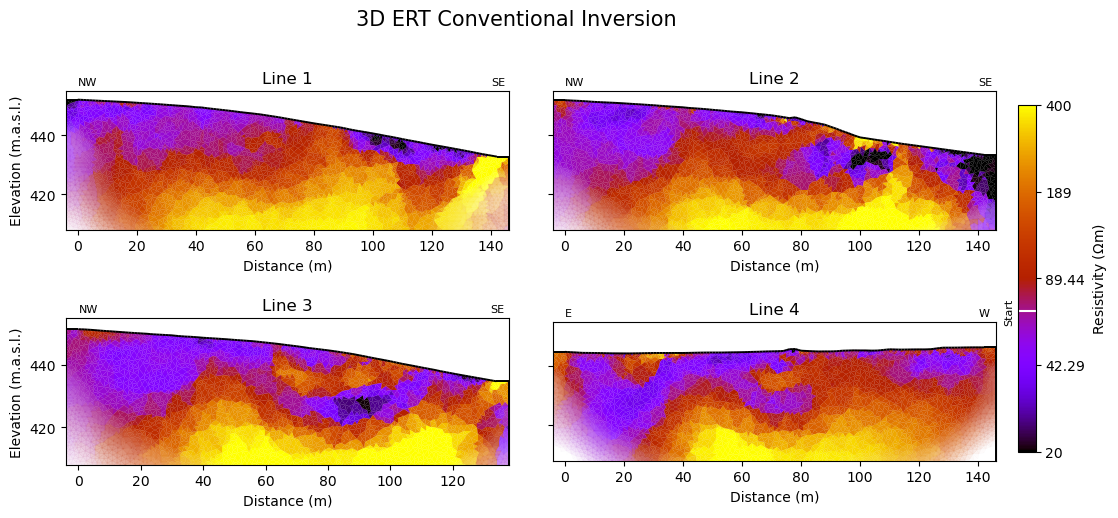

In [79]:
%matplotlib inline
m_list = [m2d1,m2d2,m2d3,m2d4]
cov_list = [cov1, cov2, cov3, cov4]


fig,ax = plt.subplots(2,2, figsize=(12,5.5), sharey=True)
plt.subplots_adjust(wspace=0.1)

pg.show(m_list[0], res_con_int_nn[0], ax=ax[0,0], coverage=cov_list[0], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)
pg.show(m_list[1], res_con_int_nn[1], ax=ax[0,1], coverage=cov_list[1], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)
pg.show(m_list[2], res_con_int_nn[2], ax=ax[1,0], coverage=cov_list[2], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)
pg.show(m_list[3], res_con_int_nn[3], ax=ax[1,1], coverage=cov_list[3], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)

for a in ax:
    for axis in a:
        axis.set_ylim(408,455)
        axis.set_xlabel('Distance (m)')
ax[0,0].set_ylabel('Elevation (m.a.s.l.)')
ax[1,0].set_ylabel('Elevation (m.a.s.l.)')
ax[0,0].set_title('Line 1')
ax[0,1].set_title('Line 2')
ax[1,0].set_title('Line 3')
ax[1,1].set_title('Line 4')

# Add colorbar
cax = ax[0,1].inset_axes([1.05, -1.6, 0.04, 2.5])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                   label=pg.unit('res'), orientation='vertical')
cax.plot([0,1],[67.413]*2, 'w')
cax.text(-0.5, 67.413, 'Start', fontsize=8, horizontalalignment='center', verticalalignment='center', rotation=90)

ax[0,0].text(0,457,'NW', fontsize=8)
ax[1,0].text(0,457,'NW', fontsize=8)
ax[0,1].text(0,457,'NW', fontsize=8)
ax[1,1].text(0,457,'E', fontsize=8)

ax[0,0].text(140,457,'SE', fontsize=8)
ax[1,0].text(132,457,'SE', fontsize=8)
ax[0,1].text(140,457,'SE', fontsize=8)
ax[1,1].text(140,457,'W', fontsize=8)

fig.suptitle('3D ERT Conventional Inversion', fontsize=15)
# plt.savefig(fig_dir+'3D_Results_Conventional_ERT.pdf', bbox_inches='tight', dpi=600)

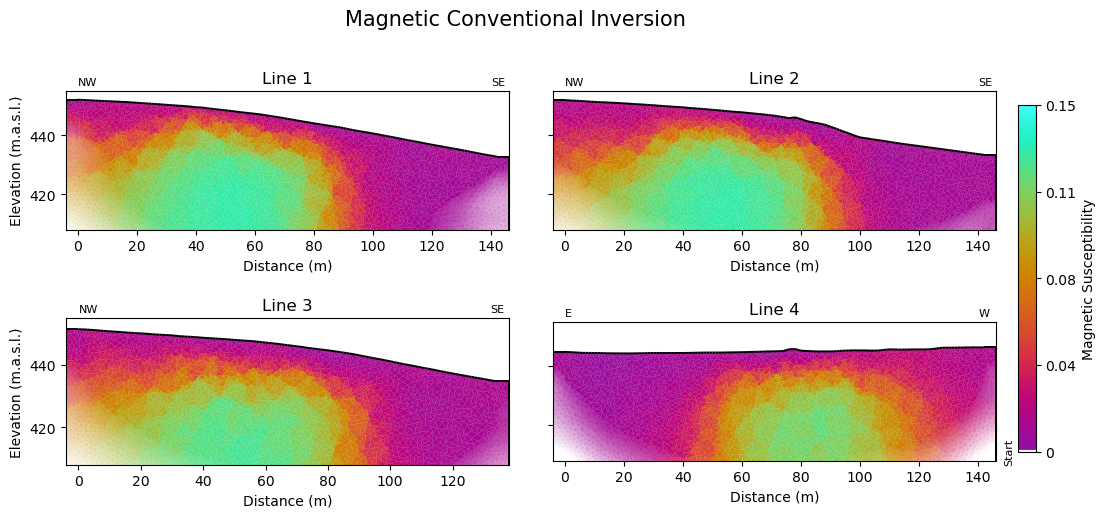

In [80]:
%matplotlib inline
m_list = [m2d1,m2d2,m2d3,m2d4]
cov_list = [cov1, cov2, cov3, cov4]


fig,ax = plt.subplots(2,2, figsize=(12,5.5), sharey=True)
plt.subplots_adjust(wspace=0.1)

pg.show(m_list[0], sus_con_int_nn[0], ax=ax[0,0], coverage=cov_list[0], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)
pg.show(m_list[1], sus_con_int_nn[1], ax=ax[0,1], coverage=cov_list[1], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)
pg.show(m_list[2], sus_con_int_nn[2], ax=ax[1,0], coverage=cov_list[2], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)
pg.show(m_list[3], sus_con_int_nn[3], ax=ax[1,1], coverage=cov_list[3], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)

for a in ax:
    for axis in a:
        axis.set_ylim(408,455)
        axis.set_xlabel('Distance (m)')
ax[0,0].set_ylabel('Elevation (m.a.s.l.)')
ax[1,0].set_ylabel('Elevation (m.a.s.l.)')
ax[0,0].set_title('Line 1')
ax[0,1].set_title('Line 2')
ax[1,0].set_title('Line 3')
ax[1,1].set_title('Line 4')

ax[0,0].text(0,457,'NW', fontsize=8)
ax[1,0].text(0,457,'NW', fontsize=8)
ax[0,1].text(0,457,'NW', fontsize=8)
ax[1,1].text(0,457,'E', fontsize=8)

ax[0,0].text(140,457,'SE', fontsize=8)
ax[1,0].text(132,457,'SE', fontsize=8)
ax[0,1].text(140,457,'SE', fontsize=8)
ax[1,1].text(140,457,'W', fontsize=8)

# Add colorbar
cax = ax[0,1].inset_axes([1.05, -1.6, 0.04, 2.5])
createColorBarOnly(ax=cax, cMin=lim_mag[0], cMax=lim_mag[1], logScale=False,cMap=c_mag,
                   label='Magnetic Susceptibility', orientation='vertical')
cax.plot([0,1],[1e-4]*2, 'w', lw=3)
cax.text(-0.5,1e-4, 'Start', fontsize=8, horizontalalignment='center', verticalalignment='center', rotation=90)

fig.suptitle('Magnetic Conventional Inversion', fontsize=15)
# plt.savefig(fig_dir+'3D_Results_Conventional_MAG.pdf', bbox_inches='tight', dpi=600)

### Show 3D ME Inversion sections

In [65]:
%matplotlib qt
m_list = [m2d1,m2d2,m2d3,m2d4]
cov_list = [cov1, cov2, cov3, cov4]

fig = plt.figure(figsize=(12, 8))
[[sf1, sf2],[sf3,sf4]] = fig.subfigures(2, 2, wspace=1)

for j, sf in enumerate([sf1, sf2, sf3, sf4]):
    ax = sf.subplots(2,1, sharex=True)
    pg.show(m_list[j], res_me1_int_nn[j], ax=ax[0], coverage=cov_list[j], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)
    pg.show(m_list[j], res_me2_int_nn[j], ax=ax[1], coverage=cov_list[j], cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], colorBar=False, logScale=True)
    
    for a in ax:
        a.set_ylim(408,455)
        a.set_ylabel('Elevation (m.a.s.l.)')
    for a in ax:
        if j==2:
            a.text(0,457,'NW', fontsize=8)
            a.text(132,457,'SE', fontsize=8)
        elif j==3:
            a.text(0,457,'E', fontsize=8)
            a.text(140,457,'W', fontsize=8)        
        else:
            a.text(0,457,'NW', fontsize=8)
            a.text(140,457,'SE', fontsize=8)
    ax[1].set_xlabel('Distance (m)')

    ax[0].set_title(f'Line {j+1}')
    
    ax[0].text(1, 414, 'q=1', fontsize=9, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1].text(1, 414, 'q=2', fontsize=9, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
cax = ax[1].inset_axes([1.1, .55, 0.06, 4])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                   label=pg.unit('res'), orientation='vertical')    
cax.plot([0,1],[67.413]*2, 'w')
cax.text(-0.3, 67.413, 'Start', fontsize=8, horizontalalignment='center', verticalalignment='center', rotation=90)

fig.suptitle('ME ERT Results', fontsize='xx-large')
# plt.savefig(fig_dir+'3D_Results_ME_ERT.pdf', bbox_inches='tight', dpi=600)

In [68]:
%matplotlib qt
m_list = [m2d1,m2d2,m2d3,m2d4]
cov_list = [cov1, cov2, cov3, cov4]

fig = plt.figure(figsize=(12, 8))
[[sf1, sf2],[sf3,sf4]] = fig.subfigures(2, 2, wspace=1)

for j, sf in enumerate([sf1, sf2, sf3, sf4]):
    ax = sf.subplots(2,1, sharex=True)
    pg.show(m_list[j], sus_me1_int_nn[j], ax=ax[0], coverage=cov_list[j], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)
    pg.show(m_list[j], sus_me2_int_nn[j], ax=ax[1], coverage=cov_list[j], cMap=c_mag, cMin=lim_mag[0], cMax=lim_mag[1], colorBar=False, logScale=False)
    # pg.show(m_list[j], sus_me1_int_nn[j], ax=ax[0], coverage=cov_list[j], cMap=c_mag, cMin=1e-6, cMax=1e-1, colorBar=False, logScale=True)
    # pg.show(m_list[j], sus_me2_int_nn[j], ax=ax[1], coverage=cov_list[j], cMap=c_mag, cMin=1e-6, cMax=1e-1, colorBar=False, logScale=True)    
    for a in ax:
        a.set_ylim(408,455)
        a.set_ylabel('Elevation (m.a.s.l.)')
        if j==2:
            a.text(0,457,'NW', fontsize=8)
            a.text(132,457,'SE', fontsize=8)
        elif j==3:
            a.text(0,457,'E', fontsize=8)
            a.text(140,457,'W', fontsize=8)        
        else:
            a.text(0,457,'NW', fontsize=8)
            a.text(140,457,'SE', fontsize=8)
    ax[1].set_xlabel('Distance (m)')

    ax[0].set_title(f'Line {j+1}')
    
    ax[0].text(1, 414, 'q=1', fontsize=9, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1].text(1, 414, 'q=2', fontsize=9, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
cax = ax[1].inset_axes([1.1, .55, 0.06, 4])
createColorBarOnly(ax=cax, cMin=lim_mag[0], cMax=lim_mag[1], logScale=False,cMap=c_mag,
                   label='Magnetic Susceptibility', orientation='vertical')    

# cax = ax[1].inset_axes([1.1, .55, 0.06, 4])
# createColorBarOnly(ax=cax, cMin=1e-6, cMax=1e-1, logScale=True,cMap=c_mag,
#                    label='Magnetic Susceptibility', orientation='vertical')    

cax.plot([0,1],[1e-4]*2, 'w')
cax.text(-0.3, 1e-4, 'Start', fontsize=8, horizontalalignment='center', verticalalignment='center', rotation=90)

fig.suptitle('ME MAG Results', fontsize='xx-large')
# plt.savefig(fig_dir+'3D_Results_ME_MAG.pdf', bbox_inches='tight', dpi=600)

Text(0.5, 0.98, 'ME MAG Results')

### Compare JME1 Weightings

In [11]:
# Magnetic anomaly outlines
l1 = mt.createPolygon([[10,409],[7,416],[1.8,418],[1.5,424],[7,429],[32,427],[38,437],[34,444],[68,436],[83,430],[86,423],[82,415],[77,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l2 = mt.createPolygon([[13,409],[7.8,418],[6,424],[4.2,433],[32,422],[39,436],[42,442],[68,436],[83,437],[86,428],[78,414],[75,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l3 = mt.createPolygon([[6,409],[1.2,418],[0.1,423],[1.6,427],[24,425],[47,433],[68,435],[74,430],[90,430],[92,424],[87,419],[81,411]],
                      isClosed=False, addNodes=5, interpolate='spline')

l4 = mt.createPolygon([[61,410],[59,416],[53,422],[52,432],[55,434],[62,427],[68,428],[77,436],[88,433],[97,435],[107,431],[106,421],[99,417],[96,412]],
                      isClosed=False, addNodes=5, interpolate='spline')

lines1 = [l1,l2,l3,l4]

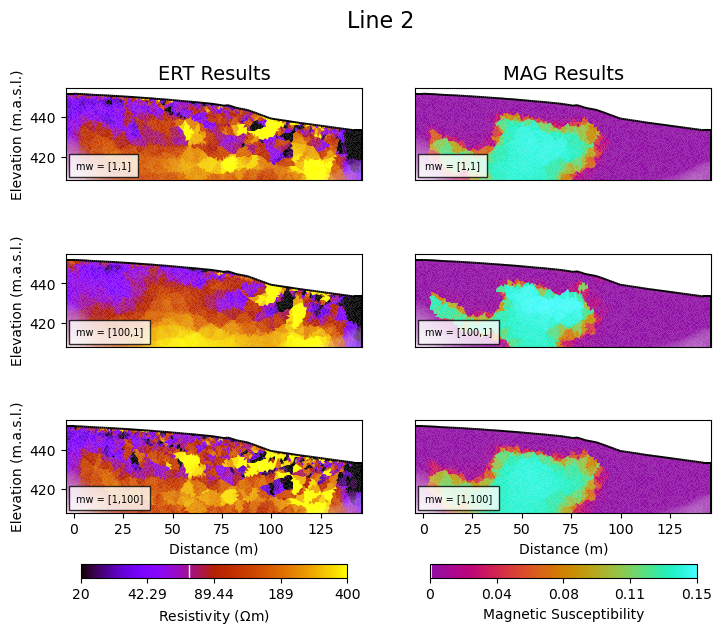

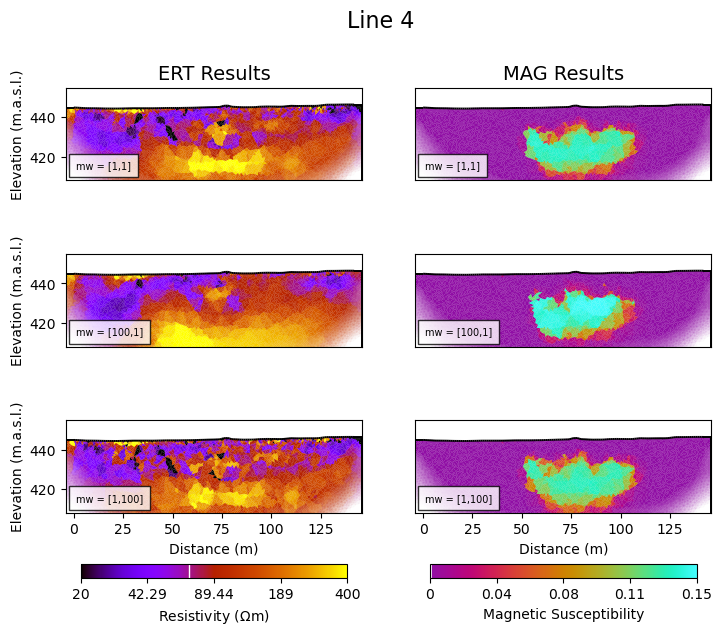

In [14]:
%matplotlib inline
cov_list = [cov1, cov2, cov3, cov4]

lines = [l1,l2,l3,l4]

for i,j in enumerate([1,3]):

    ert_start = pg.Vector(m_list[j].cellCount(), 67.413)
    mag_start = pg.Vector(m_list[j].cellCount(), 1e-4)


    fig, ax, [cax1, cax2] = plotJointResultsComparison(m_list[j], cov_list[j],
                                                       [res_jme1_int_nn[j],res_jme2_int_nn[j],res_jme3_int_nn[j]], 
                                                       [sus_jme1_int_nn[j],sus_jme2_int_nn[j],sus_jme3_int_nn[j]],
                                                       c_ert, c_mag, lim_ert, lim_mag, ['JME13','JME14','JME5'], 
                                                       figsize=(7,5))

    ax[0,0].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,0].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,0].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax[0,1].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,1].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,1].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    # fig.delaxes(ax[0,1])
    ax[0,1].set_title('MAG Results', fontsize = 14)
    
    fig.suptitle(f'Line {j+1}', fontsize = 16, x=0.51, y=1.1)
    
    cax1.plot([67.413]*2,[0,1], 'w', lw=1)
    cax2.plot([1e-4]*2,[0,1], 'w', lw=2)

    # plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/JME_mw_models_l{j+1}.pdf', 
    #         bbox_inches='tight',
    #         dpi=600)

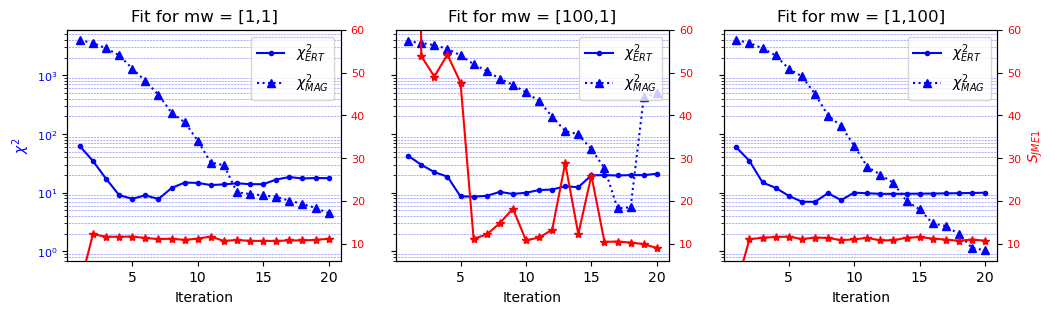

In [15]:
chi_1_1 = np.load(fn_dir+'Res_JME1/Res_JME1_1_1/ChiHistory_jme.npy')
chi_100_1 = np.load(fn_dir+'Res_JME1/Res_JME1_100_1/ChiHistory_jme.npy')
chi_1_100 = np.load(fn_dir+'Res_JME1/Res_JME1_1_100/ChiHistory_jme.npy')

S_1_1 = np.load(fn_dir+'Res_JME1/Res_JME1_1_1/SHistory_jme.npy')
S_100_1 = np.load(fn_dir+'Res_JME1/Res_JME1_100_1/SHistory_jme.npy')
S_1_100 = np.load(fn_dir+'Res_JME1/Res_JME1_1_100/SHistory_jme.npy')

%matplotlib inline
chi = [chi_1_1, chi_100_1, chi_1_100]
S = [S_1_1, S_100_1, S_1_100]
names = ['mw = [1,1]','mw = [100,1]','mw = [1,100]']

it = np.arange(20)+1

fig,ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,3))

for i in [0,1,2]:
    ax[i].plot(it,chi[i][0,:],'b.-', label=r'$\chi^2_{ERT}$')
    ax[i].plot(it,chi[i][1,:],'b^:', label=r'$\chi^2_{MAG}$')

    ax[i].set_yscale('log')
    ax[i].set_xlabel('Iteration')
    ax[i].tick_params(axis ='y', which='both', labelcolor='blue', labelsize=8)
    ax[i].set_title(f'Fit for {names[i]}')
    ax[i].grid(which='minor',axis='y', color='blue', linestyle=':', linewidth=0.4)
    ax[i].legend()
    
    ax2 = ax[i].twinx()
            
    ax2.plot(it,S[i],'r*-', label=r'$S_{JME1}$')
    ax2.tick_params(axis ='y', which='both', labelcolor='red', labelsize=8)
    ax2.grid(which='minor',axis='y', color='red', linestyle=':', linewidth=0.4)
    # ax2.set_yscale('log')
    ax2.set_ylim(6,60)

ax[0].set_ylabel('$\chi^2$', color='blue')
ax2.set_ylabel(r'$S_{JME1}$', color='red')  

# fig.suptitle('Data fit for different method weighting factors', fontsize=16, x=0.5, y=1.05)

# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/JME_mw_fit.pdf', 
#             bbox_inches='tight',
#             dpi=600)

### Show different inversion results (Fig. 10)

In [11]:
# Magnetic anomaly outlines
l1 = mt.createPolygon([[10,409],[7,416],[1.8,418],[1.5,424],[7,429],[32,427],[38,437],[34,444],[68,436],[83,430],[86,423],[82,415],[77,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l2 = mt.createPolygon([[13,409],[7.8,418],[6,424],[4.2,433],[32,422],[39,436],[42,442],[68,436],[83,437],[86,428],[78,414],[75,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l3 = mt.createPolygon([[6,409],[1.2,418],[0.1,423],[1.6,427],[24,425],[47,433],[68,435],[74,430],[90,430],[92,424],[87,419],[81,411]],
                      isClosed=False, addNodes=5, interpolate='spline')

l4 = mt.createPolygon([[61,410],[59,416],[53,422],[52,432],[55,434],[62,427],[68,428],[77,436],[88,433],[97,435],[107,431],[106,421],[99,417],[96,412]],
                      isClosed=False, addNodes=5, interpolate='spline')

lines1 = [l1,l2,l3,l4]

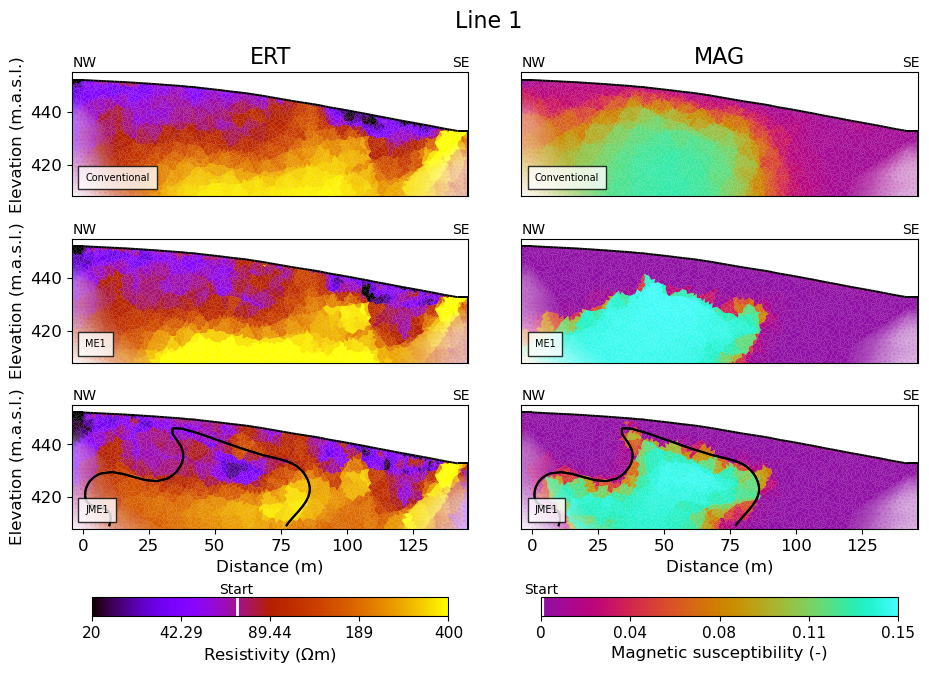

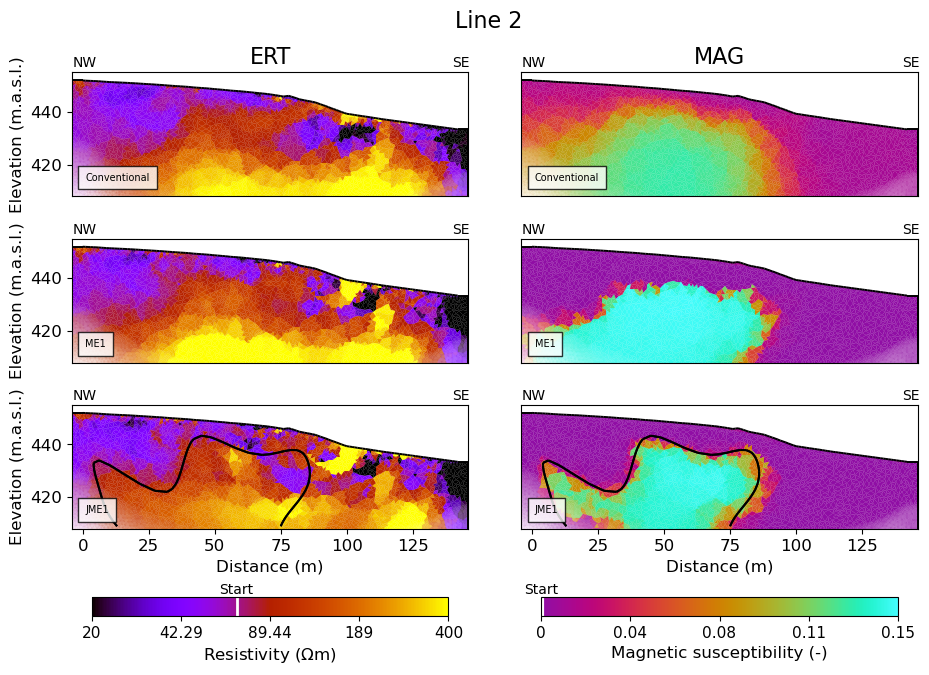

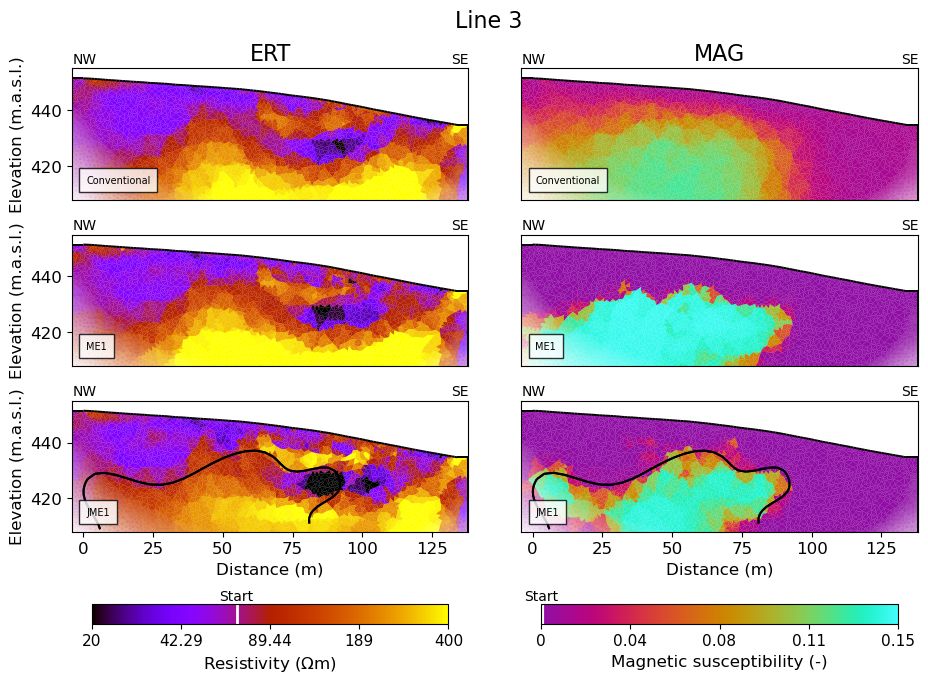

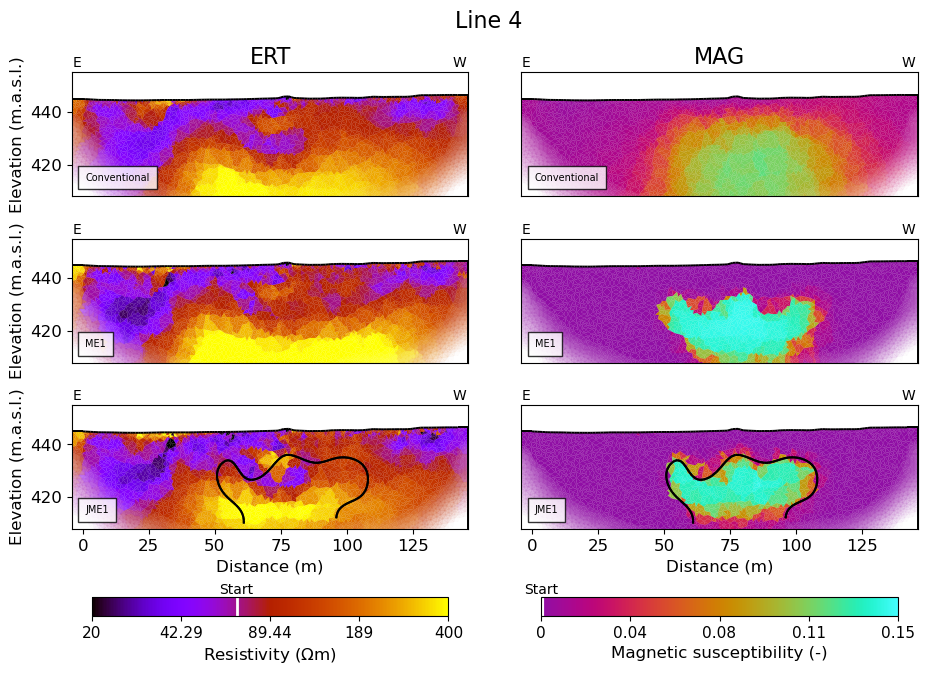

In [16]:
%matplotlib inline

cov_list = [cov1, cov2, cov3, cov4]
res_2d = [res2d1, res2d2, res2d3, res2d4]

for j in [0,1,2,3]:

    ert_start = pg.Vector(m_list[j].cellCount(), 67.413)
    mag_start = pg.Vector(m_list[j].cellCount(), 1e-4)



    fig, ax, [cax1, cax2] = plotJointResultsComparison(m_list[j], cov_list[j],
                                                       [res_con_int_nn[j],res_me1_int_nn[j],res_jme4_int_nn[j]], 
                                                       [sus_con_int_nn[j],sus_me1_int_nn[j],sus_jme4_int_nn[j]],
                                                       c_ert, c_mag, lim_ert, lim_mag, ['2D','Conventional', 'ME1', 'JME1'], 
                                                       figsize=(9,5))
    
    for i,lab in enumerate(['Conventional', 'ME1', 'JME1']):
        for b in [0,1]:
            ax[i,b].text(1, 414, lab, fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    pg.show(lines1[j],ax=ax[2,0], fillRegion=False)
    pg.show(lines1[j],ax=ax[2,1], fillRegion=False)
    
    for a in ax:
        for axis in a:
            axis.set_ylim(408,455)

    for axis in ax:
        for a in axis:
            a.tick_params(labelsize=12)
    
    cax2.plot([1e-4]*2, [0,1], 'w', lw=3)
    cax2.text(1e-4, 1.4, 'Start', fontsize=10, horizontalalignment='center', verticalalignment='center')
    
    cax1.plot([67.413]*2, [0,1], 'w', lw=2)
    cax1.text(67.413, 1.4, 'Start', fontsize=10, horizontalalignment='center', verticalalignment='center')
    
    for axis in ax:
        for a in axis:
            a.set_ylim(408,455)
            if j==2:
                a.text(-4,457,'NW', fontsize=10)
                a.text(132,457,'SE', fontsize=10)
            elif j==3:
                a.text(-4,457,'E', fontsize=10)
                a.text(140,457,'W', fontsize=10)        
            else:
                a.text(-4,457,'NW', fontsize=10)
                a.text(140,457,'SE', fontsize=10)
                
    fig.suptitle(f'Line {j+1}',fontsize=16, x=.51, y=1.1)
    
    # plt.savefig(fig_dir+f'Best_result_comp_l{j+1}.pdf', 
    #         bbox_inches='tight',
    #         dpi=600)

### Show Stabilizer of JME result

In [16]:
# Calculate model weights of last iteration
def normalize(m, m0):
    mmin = min(np.log(m))
    mmax = max(np.log(m))
    m_new = (np.log(m)-mmin)/(mmax-mmin+1e-10)
    m0_new = (np.log(m0)-mmin)/(mmax-mmin+1e-10)
    return m_new, m0_new

# Start Models
m0e = pg.Vector(40005,67.413)
m0m = pg.Vector(40005,1e-4)

# Normalize Models
[me, m0e] = normalize(res_jme4, m0e)
[mm, m0m] = normalize(sus_jme4, m0m)

# Calculate Helpers
Q =  np.sum(10*abs(me-m0e)+1e-10) + np.sum(abs(mm-m0m)+1e-10)
ds = 10*abs(me-m0e)+abs(mm-m0m)

# Calculate Log and pre-Log
log = np.log(Q/(1e-10+ds))
fac_m = 1/Q * 1/(1e-10+abs(mm-m0m)**2) * (1e-10+abs(mm-m0m))
fac_e = 1/Q * 1/(1e-10+abs(me-m0e)**2) * (1e-10+abs(me-m0e))

# Calculate weights
we = np.sqrt(fac_e*log)
wm = np.sqrt(fac_m*log)

# Interpolate
we_nn = Transfer3DdataTo2DSection(we, idx_all_list, x=1e-1)
wm_nn = Transfer3DdataTo2DSection(wm, idx_all_list, x=1e-1)
mm_nn = Transfer3DdataTo2DSection(mm, idx_all_list, x=1e-4)
m0m_nn = Transfer3DdataTo2DSection(m0m, idx_all_list, x=1e-4)

S = (we*abs(me-m0e))**2 + (wm*abs(mm-m0m))**2
S_nn = Transfer3DdataTo2DSection(S, idx_all_list, x=0)

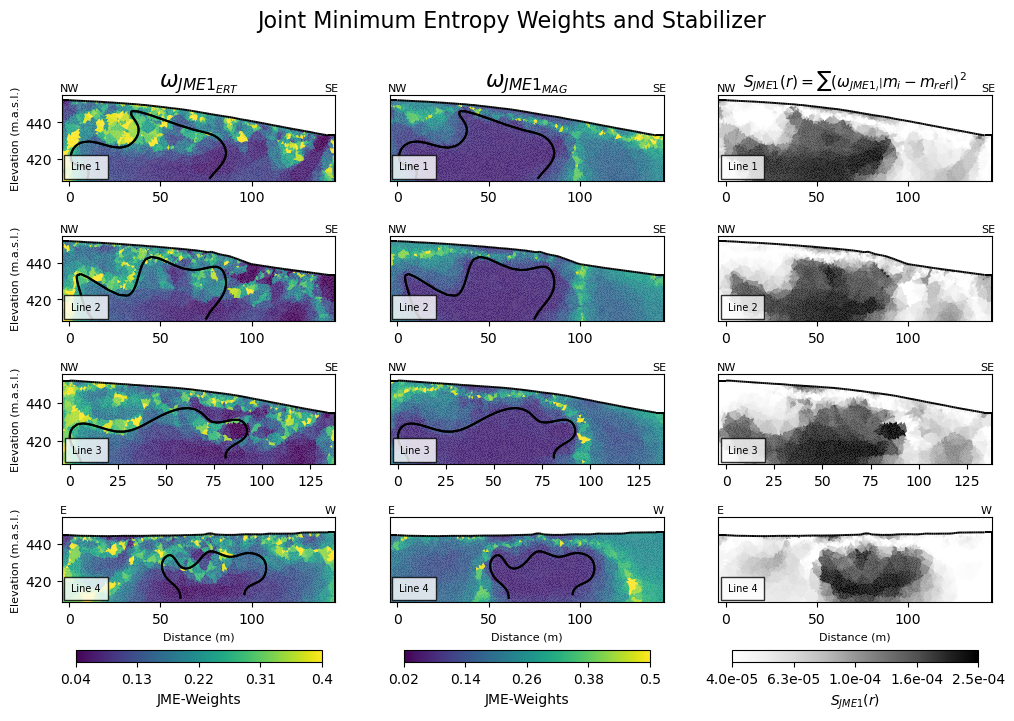

In [18]:
%matplotlib inline

fig, ax = plt.subplots(4,3, figsize=(12,7))
fig.suptitle(f'Joint Minimum Entropy Weights and Stabilizer', fontsize=16)
ax[0,0].set_title(r'$\omega_{JME1_{ERT}}$', fontsize = 16)
ax[0,1].set_title(r'$\omega_{JME1_{MAG}}$', fontsize = 16)
ax[0,2].set_title(r'$S_{JME1}(r) = \sum \left(\omega_{JME1_{i}} \left| m_i - m_{ref} \right|\right)^2$', fontsize = 11)

for j in [0,1,2,3]:

    pg.show(m_list[j], we_nn[j], ax=ax[j,0], cMin=0.04, cMax=0.4, cMap='viridis', colorBar=False, logScale=True)
    pg.show(m_list[j], wm_nn[j], ax=ax[j,1], cMin=0.025, cMax=0.5, cMap='viridis', colorBar=False, logScale=True)
    pg.show(m_list[j], S_nn[j], ax=ax[j,2], cMin=4e-5, cMax=2.5e-4, cMap='Greys', colorBar=False, logScale=False)
    
    pg.show(lines1[j],ax=ax[j,0], fillRegion=False)
    pg.show(lines1[j],ax=ax[j,1], fillRegion=False)
    
    for a in [ax[j,0],ax[j,1],ax[j,2]]:
        a.set_ylim(408,455)
        if j==2:
            a.text(-5,457,'NW', fontsize=8)
            a.text(132,457,'SE', fontsize=8)
        elif j==3:
            a.text(-5,457,'E', fontsize=8)
            a.text(140,457,'W', fontsize=8)        
        else:
            a.text(-5,457,'NW', fontsize=8)
            a.text(140,457,'SE', fontsize=8)
    
# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Elevation (m.a.s.l.)', fontsize=8)
for axis in ax[-1,:]:
    axis.set_xlabel('Distance (m)', fontsize=8)
# for ax_ar in ax[:-1,:]:
#     for axis in ax_ar:
#         axis.set_xticks([])
for a in ax[:,1:]:
    for axis in a:
        axis.set_yticks([])
for ax_ar in ax:
    for axis in ax_ar:
        axis.set_ylim(408,455)
        
for i,lab in enumerate(['Line 1','Line 2','Line 3','Line 4']):
    for b in [0,1,2]:
        ax[i,b].text(1, 414, lab, fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        
# Add colorbar ERT
cax1 = ax[-1,0].inset_axes([0.05, -0.7, 0.9, 0.15])
createColorBarOnly(ax=cax1, cMin=0.04, cMax=0.4, logScale=False,cMap='viridis',
                          label='JME-Weights', orientation='horizontal')

# Add colorbar MAG
cax2 = ax[-1,1].inset_axes([0.05, -0.7, 0.9, 0.15])
createColorBarOnly(ax=cax2, cMin=0.025, cMax=0.5, logScale=False,cMap='viridis',
                          label='JME-Weights', orientation='horizontal')

# Add colorbar Log
cax2 = ax[-1,2].inset_axes([0.05, -0.7, 0.9, 0.15])
createColorBarOnly(ax=cax2, cMin=4e-5, cMax=2.5e-4, logScale=True,cMap='Greys',
                          label='$S_{JME1}(r)$', orientation='horizontal')

# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/JME1_weights.pdf', 
#             bbox_inches='tight',
#             dpi=600)

### Show misfits for different methods

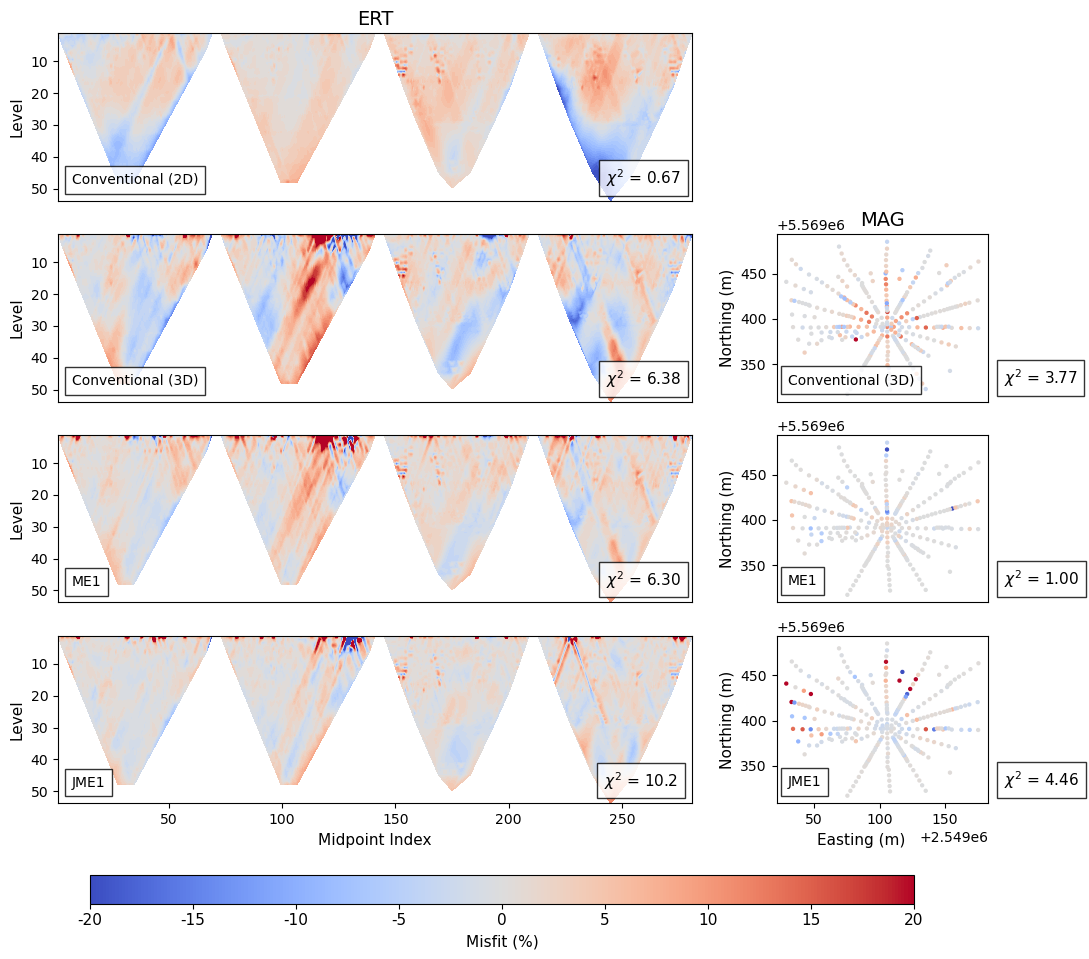

In [22]:
%matplotlib inline
lim_max = 20
lim = [-lim_max,lim_max] # Misfit limits
label_list = ['Conventional (2D)','Conventional (3D)', 'ME1', 'JME1']

mag_misfit = [misfit_mag_con, misfit_mag_con, misfit_mag_me1, misfit_mag_jme4]
ert_misfit = [misfit_2d, misfit_ert_con, misfit_ert_me1, misfit_ert_jme4]

# chi^2 values for inversion results
ert_chi2 = [0.67, 6.38, 6.30, 10.2]
mag_chi2 = [3.77, 3.77, 1.00, 4.46]

cmap='coolwarm'

from pygimli.physics            import ert
ert_data    = ert.load(fn_dir+fn_all)

fig, ax = plt.subplots(len(label_list),2, figsize=(12,10), gridspec_kw={'width_ratios': [3, 1]})

for i in range(len(label_list)):
    # Plot misfits
    showPseudosections(ert_data, ert_misfit[i], [0, 2055, 4134, 5906, 7694], 4, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showMagMisfit(pnts, 'misfit', mag_misfit[i], ax[i,1], lim=lim_max, size=5)
    
    ax[i,0].set_ylabel('Level', fontsize=11)
    ax[i,1].set_ylabel('Northing (m)', fontsize=11)
    
    # Add labels
    ax[i,0].text(7, 48.5, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[i,1].text(2549030, 5569328, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
    if ert_chi2[i]>=10:
        ax[i,0].text(242, 48.5, f'$\chi^2$ = {ert_chi2[i]:.1f}', fontsize=11, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    else:
        ax[i,0].text(243, 48.5, f'$\chi^2$ = {ert_chi2[i]:.2f}', fontsize=11, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[i,1].text(2549195, 5569328, f'$\chi^2$ = {mag_chi2[i]:.2f}', fontsize=11, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.05, -0.6, 1.3, 0.17])
cb = createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False, cMap=cmap, nLevs=9,
                   label='Misfit (%)', orientation='horizontal')

# fig.suptitle(f'Misfit',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=14)
ax[1,1].set_title('MAG',fontsize=14)
fig.delaxes(ax[0,1])

ax[-1,0].set_xlabel('Midpoint Index', fontsize=11)
ax[-1,1].set_xlabel('Easting (m)', fontsize=11)
cax.set_xlabel('Misfit (%)', fontsize=11)
cax.tick_params(labelsize=11)

ax[-1,0].xaxis.set_label_coords(0.5, -0.18)
ax[-1,1].xaxis.set_label_coords(0.4, -0.18)



# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/Best_misfit_comp.pdf', 
#             bbox_inches='tight',
#             dpi=600)

### Show 3D Model

In [24]:
%matplotlib widget
res = res_jme4
sus = sus_jme4

mesh['sus'] = sus
mesh['res'] = res

res_lim= res.copy()

for i, r in enumerate(res_lim):
    if r<20:
        res_lim[i] = 20
    elif r>400:
        res_lim[i] = 400

mesh['res_lim'] = res_lim

In [58]:
c_ert='hsv'
pl, _ = pg.show(mesh, mesh.cellMarkers(), cMap='Greys', hold=True, notebook=False, alpha=0.1)
# pv.drawMesh(pl, mesh, label="res_lim", style="surface", cMap=c_ert, alpha=1,
#             filter={"threshold": dict(value=150, scalars='res_lim')})
# pv.drawMesh(pl, mesh, label="sus", style="surface", cMap=c_mag, alpha=.5,
#             filter={"threshold": dict(value=0.1, scalars="sus")})

# Slice along Profile
# AZdrawSlice_along_line(pl, mesh, cmap=c_mag, pnts=p1, data=mesh["sus"], label="sus")
AZdrawSlice_along_line(pl, mesh, cmap=c_ert, pnts=p2, data=mesh["res_lim"], label="res_lim")
# AZdrawSlice_along_line(pl, mesh, cmap=c_mag, pnts=p4, data=mesh["sus"], label="sus")

# Horizontal slice
pv.drawMesh(pl, mesh, label="res_lim", style="surface", cMap=c_ert,
                filter={"slice": dict(normal=[0, 0, 1], origin=[0.5*(mesh.xmax()-mesh.xmin()),0.5*(mesh.ymax()-mesh.ymin()),420])})

# Draw sensors
pv.drawSensors(pl, p1, diam=.5, color='darkolivegreen')
pv.drawSensors(pl, p2, diam=.5, color='limegreen')
pv.drawSensors(pl, p3, diam=.5, color='springgreen')
pv.drawSensors(pl, p4, diam=.5, color='aquamarine')
pv.drawSensors(pl, pnts, diam=.5, color='blue')

pl.show()

## Export Mesh with JME Result

In [25]:
mesh.exportVTK(fn_dir+'Mesh_with_Joint_Result')